In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [4]:
api_wrapper_arxiv = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_arxiv)
wiki.name

'wikipedia'

In [7]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [8]:
from langchain_community.tools import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\asus\AppData\Local\Temp\ipykernel_34636\3199068605.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [9]:
tavily.invoke("Provide me the recent AI news")

[{'title': 'AI News & Artificial Intelligence - TechCrunch',
  'url': 'https://techcrunch.com/category/artificial-intelligence/',
  'content': '### [Four months after a $3B valuation, Harvey AI grows to $5B](https://techcrunch.com/2025/06/23/four-months-after-a-3b-valuation-harvey-ai-grows-to-5b/)\n\n![Amazon event](https://techcrunch.com/wp-content/uploads/2025/02/1000002054.jpg?w=499)\n\n### [Over a million people now have access to the gen-AI powered Alexa+](https://techcrunch.com/2025/06/23/over-a-million-people-now-have-access-to-the-gen-ai-powered-alexa/) [...] ### [Google adds AI features to Chromebook Plus devices](https://techcrunch.com/2025/06/23/google-adds-ai-features-to-chromebook-plus-devices/)\n\n![Sam Altman and Jony Ive](https://techcrunch.com/wp-content/uploads/2025/05/portrait.jpg?w=500)\n\n### [OpenAI pulls promotional materials around Jony Ive deal due to court order](https://techcrunch.com/2025/06/22/openai-pulls-promotional-materials-around-jony-ive-deal/) [...] 

In [16]:
tools = [arxiv, wiki, tavily]

In [17]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = "qwen-qwq-32b")


In [18]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI?" I need to explain it in a clear and simple way. Let me start by breaking down the term: AI stands for Artificial Intelligence. But what does that really mean?\n\nHmm, maybe I should define AI as a branch of computer science. Yeah, that\'s right. It\'s focused on creating machines that can perform tasks requiring human-like intelligence. But I should give examples to make it relatable. Like, things such as problem-solving, learning, perception, and decision-making.\n\nWait, I should mention the two main types of AI: general and narrow. General AI is like the stuff in movies, where machines can handle any task a human can. But that\'s still theoretical. Narrow AI is what we actually have now, like voice assistants and recommendation systems. That distinction is important to avoid confusion.\n\nAlso, maybe touch on how AI works. Machine learning and deep learning are key here. Machine learning is when machines learn fro

In [20]:
llm_with_tools = llm.bind_tools(tools=tools)

In [21]:
llm_with_tools.invoke("What is the recent news on AI")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. I need to figure out which tool to use here. Let me check the available functions again. There\'s arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is for academic papers, so maybe not the best for recent news. Wikipedia is for encyclopedic info, which also might not be the most current. Tavily\'s search results, though, are supposed to provide up-to-date information. That seems right for "recent news."\n\nI should make sure the query is phrased correctly. The user wants recent news, so the query parameters should include terms like "latest" or "recent" to get the most current articles. Let me structure the tool call with Tavily\'s function and a query like "recent news on AI" to capture the latest developments. \n\nDouble-checking the function parameters: the tavily_search_results_json requires a "query" parameter. Yep, that\'s covered. Alright, I\'ll format the too

In [22]:
llm_with_tools.invoke("What is the latest research on quantum computing")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the latest research on quantum computing. I need to figure out which tool to use here. Let me look at the available functions again. There\'s arxiv, which is for academic papers, especially in physics and computer science. Since quantum computing is a hot topic in research, Arxiv might be the best source for the latest preprints. The other options are Wikipedia and Tavily search. Wikipedia would give a general overview but not the latest research. Tavily might give some web results, but Arxiv is more specialized and likely to have recent studies. So I should call the arxiv function with a query like "quantum computing" to get the most recent papers. Let me make sure the parameters are correct. The arxiv function requires a "query" parameter, so I\'ll structure the tool call accordingly. Alright, that should fetch the latest research papers for the user.\n', 'tool_calls': [{'id': 'hsbv9afhg', '

In [23]:
llm_with_tools.invoke("What is machine learning")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is machine learning?" I need to figure out which tool to use here. Let me look at the available functions again. There\'s arxiv for academic papers, Wikipedia for general information, and Tavily for search results.\n\nHmm, the user probably wants a general explanation. Wikipedia is good for that since it provides clear, foundational definitions. The Wikipedia function requires a query parameter. The term "machine learning" should be the query here. Let me check if there\'s a Wikipedia page on Machine Learning. Yes, there\'s a well-known article on that exact topic. \n\nAlternatively, maybe using Tavily could give a broader range of sources, but since the question is pretty straightforward, Wikipedia should suffice. The arXiv might be more detailed but is more academic and could include very specific research topics rather than a basic explanation. \n\nSo, the best choice is the Wikipedia funct

In [24]:
##State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [26]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

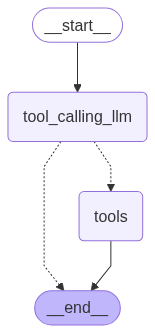

In [28]:
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))